# Введение в искусственные нейронные сети
# Урок 2. Keras

## Практическое задание

Используем набор примеров fashion-MNIST

Загрузка Fashion_MNIST

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [3]:
from keras.datasets import fashion_mnist

In [4]:
(train_image,train_label),(test_image,test_label) = fashion_mnist.load_data()

In [5]:
np.shape(train_image), np.shape(test_image)

((60000, 28, 28), (10000, 28, 28))

In [6]:
ind=np.where(train_label==3)[0]
ind

array([    3,    20,    25, ..., 59971, 59980, 59997], dtype=int64)

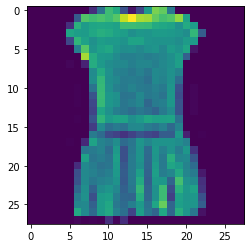

In [7]:
#plt.gray()
plt.imshow(train_image[3,:,:])
plt.show()

In [8]:
# finding out what the the input layer shape should be
input_len = (np.shape(train_image)[1])*(np.shape(train_image)[2])
input_len

784

In [9]:
# unique labels
output_len = len(set(train_label))
output_len

10

1.  Опишите - какой результата получен в нейросети в зависимости от:
  -  числа нейронов в слое(для 2-хслойной сети), 

In [10]:
train_flatten = train_image.reshape(60000,784)
test_flatten = test_image.reshape(10000,784)

313/313 [==============================] - 1s 2ms/step - loss: 0.5556 - accuracy: 0.8357


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


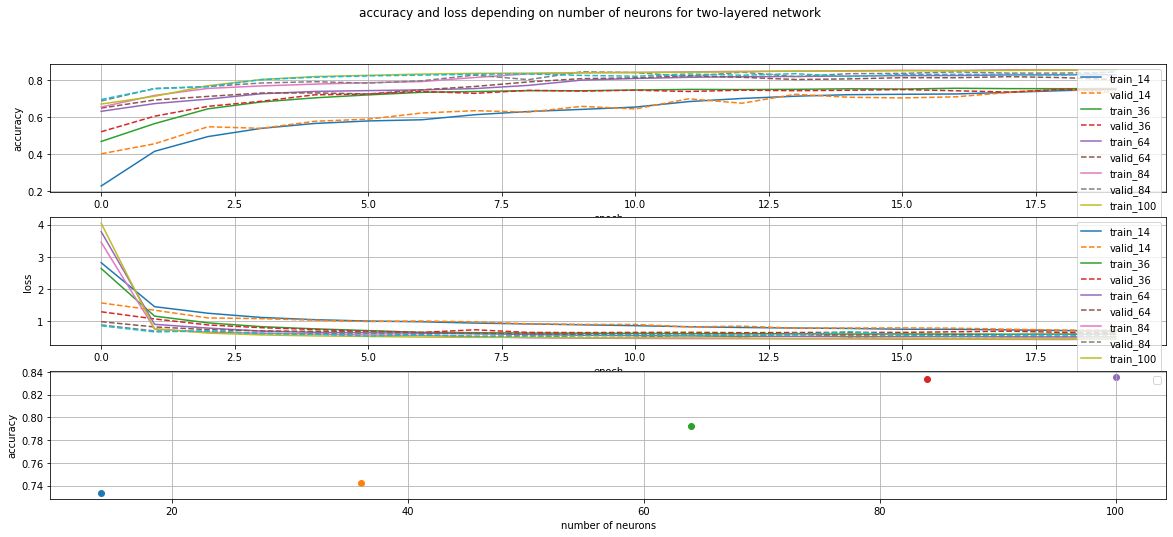

In [11]:
# building models with different number of neurons (14, 36, 64, 84, 100)
neur_num_list = (14, 36, 64, 84, 100)
epochs = 20
epoch = np.arange(epochs)

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

fig.suptitle('accuracy and loss depending on number of neurons for two-layered network')

train_accuracy_nadam = {}
val_accuracy_nadam = {}
test_accuracy_nadam = {}

for neur_num in neur_num_list:
    model = Sequential([Dense(neur_num, activation='relu', input_shape=(input_len,)),
                        Dense(output_len, activation='softmax'),
                      ])

    # compiling the current model
    model.compile(optimizer='NAdam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'],
                 )
    # training the model
    trained_model = model.fit(train_flatten,
                              to_categorical(train_label),
                              epochs=epochs,
                              batch_size=32, validation_split=0.2, verbose = 0
                             )
    model.save(f'model_{neur_num}.h5')
    
    # evaluating on test data
    test_accuracy_nadam[neur_num] = model.evaluate(test_flatten, to_categorical(test_label), return_dict=True)
        

    # drawing a graph
    ax1.plot(epoch,trained_model.history['accuracy'], '-', label = f'train_{neur_num}')
    ax1.plot(epoch,trained_model.history['val_accuracy'], '--', label = f'valid_{neur_num}')
    
    train_accuracy_nadam = {neur_num:trained_model.history['accuracy']}
    val_accuracy_nadam = {neur_num:trained_model.history['val_accuracy']}

    
    ax2.plot(epoch,trained_model.history['loss'], '-', label = f'train_{neur_num}')
    ax2.plot(epoch,trained_model.history['val_loss'], '--', label = f'valid_{neur_num}')
    
    
    ax3.scatter(neur_num, test_accuracy_nadam[neur_num]['accuracy'])


ax1.set_xlabel('epoch')
ax1.set_ylabel('accuracy')
ax1.legend()
ax1.grid('On')

ax2.set_xlabel('epoch')
ax2.set_ylabel('loss')
ax2.legend()
ax2.grid('On')

ax3.set_xlabel('number of neurons')
ax3.set_ylabel('accuracy')
ax3.legend()
ax3.grid('On')
plt.show()


In [12]:
test_predict = model.predict(test_flatten)
test_metrics = model.evaluate(test_flatten, to_categorical(test_label), return_dict=True)

313/313 [==============================] - 1s 2ms/step - loss: 0.5556 - accuracy: 0.8357


In [13]:
y_pred_class = np.argmax(test_predict,axis=1)

In [14]:
len(np.where(test_label != y_pred_class)[0])

1643

In [15]:
np.where(test_label != y_pred_class)

(array([  21,   23,   25, ..., 9985, 9989, 9991], dtype=int64),)

  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.


2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

## Дополнительные материалы

<ol>
    <li> https://keras.io/</li>
    <li> https://playground.tensorflow.org/ - визуализация сетей 
</ol>

## Используемая литература 

Для подготовки данного методического пособия были использованы следующие ресурсы:
<ol>
    <li>https://keras.io/</li>
    <li>Шакла Н. — Машинное обучение и TensorFlow 2019</li>
    <li>Саймон Хайкин — Нейронные сети: полный курс</li>
    <li>Википедия</li>
    
</ol>